# Динамика
## Дифференциальные уравнения движения точки. Общие теоремы динамики точки.
Условие. Тело S, рассматриваемое как материальная точка массы m,
движется по шероховатой поверхности из состояния покоя от точки А к точке
В, в которой отрывается от поверхности и продолжает движение до точки К. На
участке АВ, коэффициент трения на котором равен f, на тело действует постоянная сила Q . Используя уравнение движения тела на участках АВ, ВК, основные теоремы динамики точки определить время движения от начального к конечному положению, т.е. от точки А к точке К, скорость тела в точке В, расстояние DК.

Вначале импортируем библиотеки:

In [ ]:
from numpy import cos, sin, tan, arange
from math import pi
from scipy.optimize import root, fsolve
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#подключаемся к хранилищу
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Импортируем файл excel и преобразуем его в data-frame.

In [ ]:
DynVar = pd.read_excel('/content/drive/MyDrive/Преподаватель/Термех/D1 var.xlsx')
DynVar.head()

,№,picture,m,Q,AB,BD,BC,CD,phi,alpha,beta,phi.1
0,1,0,2.0,50,1.0,2,0.0,0,60,30,0,0.05
1,2,0,3.0,60,1.5,3,0.0,0,30,60,0,0.10
2,3,0,4.0,70,2.0,3,0.0,0,0,30,0,0.15
3,4,1,2.0,80,0.5,0,10.0,5,30,45,0,0.10
4,5,1,3.0,110,0.7,0,12.0,7,60,30,0,0.15


Задаём константы для решения задачи

In [ ]:
rad = lambda x: x*pi/180 #лямбда-функция для перевода градусов в радианы

grav = 9.8061 #ускорение свободного падения

var = 1 #вариант задачи

In [ ]:
DynVar[DynVar['№'] == var] #строка data-frame для текущего варианта

,№,picture,m,Q,AB,BD,BC,CD,phi,alpha,beta,phi.1
0,1,0,2.0,50,1.0,2,0.0,0,60,30,0,0.05


Теперь зададим переменные к значениям data-frame

In [ ]:
phi = rad(float(DynVar[DynVar['№'] == var]['phi']))
alpha = rad(float(DynVar[DynVar['№'] == var]['alpha']))
beta = rad(float(DynVar[DynVar['№'] == var]['beta']))
mass = float(DynVar[DynVar['№'] == var]['m'])
force_ext = float(DynVar[DynVar['№'] == var]['Q'])
AB = float(DynVar[DynVar['№'] == var]['AB'])
BD = float(DynVar[DynVar['№'] == var]['BD'])
BC = float(DynVar[DynVar['№'] == var]['BC'])
CD = float(DynVar[DynVar['№'] == var]['CD'])
friction = float(DynVar[DynVar['№'] == var]['phi.1'])
pict = int(DynVar[DynVar['№'] == var]['picture'])


if pict == 3 or pict == 6:
  BD = AB * sin(alpha)


Рассмотрим движение тела на прямолинейном участке АВ с помощью второго закона Ньютона

In [ ]:
support_reaction = mass * grav * cos(alpha) + force_ext * sin(phi)

force = [
    mass * grav * sin(alpha) + force_ext * cos(phi) - friction * support_reaction,
    - mass * grav * sin(alpha) + force_ext * cos(phi) - friction * support_reaction,
    force_ext * cos(phi) - friction * support_reaction,
    - mass * grav * sin(alpha) + force_ext * cos(phi) - friction * support_reaction,
    force_ext * cos(phi) - friction * support_reaction,
    force_ext * cos(phi) - friction * support_reaction,
    - mass * grav * sin(alpha) + force_ext * cos(phi) - friction * support_reaction,
    - mass * grav * sin(alpha) + force_ext * cos(phi) - friction * support_reaction,
    mass * grav * sin(alpha) + force_ext * cos(phi) - friction * support_reaction,
    force_ext * cos(phi) - friction * support_reaction
]

boost_x = force[pict] / mass
timeAB = (2 * AB / boost_x)**0.5
speedAB = boost_x * timeAB

print(f'''Закон движения х = {round(boost_x,2)}*t^2/2
t_AB = {round(timeAB,2)} c
v_AB = {round(speedAB, 2)} м/с''')

Закон движения х = 15.9*t^2/2
t_AB = 0.35 c
v_AB = 5.64 м/с


Рассмотри аналогичное движение с точки зрения теорем об изменении кинетической энергии и количества движения.

In [ ]:
work_ext = force_ext * AB * cos(phi)
work_grav = mass * grav * AB * sin(alpha)
work_friction = friction * support_reaction *  AB
sum_work = [
    work_ext + work_grav - work_friction,
    work_ext - work_grav - work_friction,
    work_ext - work_friction,
    work_ext - work_grav - work_friction,
    work_ext - work_friction,
    work_ext - work_friction,
    work_ext - work_grav - work_friction,
    work_ext - work_grav - work_friction,
    work_ext + work_grav - work_friction,
    work_ext - work_grav - work_friction,
]
speed_work_AB = (2 *(sum_work[pict]) / mass) ** 0.5
print(f'v_AB = {round(speed_work_AB, 2)} м/с')
time_work_AB = mass * speed_work_AB / force[pict]
print(f't_AB = {round(time_work_AB,2)} c')

v_AB = 5.64 м/с
t_AB = 0.35 c


Рассмотрим свободный полёт тела в безвоздушном пространства (силой сопротивления воздуха пренебрегаем), т.е. рассматриваем только движение под действием силы тяжести.

In [ ]:
x_body = [
    lambda t : speedAB * cos(alpha) * t,
    lambda t : BC + speedAB * sin(alpha) * t - 0.5 * grav * t**2,
    lambda t : speedAB * t,
    lambda t : speedAB * cos(alpha) * t,
    lambda t : BC - 0.5 * grav * t**2,
    lambda t : speedAB * t,
    lambda t : speedAB * cos(alpha) * t,
    lambda t : speedAB * cos(alpha) * t,
    lambda t : speedAB * cos(alpha) * t,
    lambda t : speedAB * t
]

body_solve = [
    lambda t : grav * t ** 2 - 2 * BD, # pict = 0
    lambda t : speedAB * cos(alpha) * t - CD, # pict = 1
    lambda t : BD - speedAB * t * cos(beta) / sin(beta) - 0.5 * grav * t ** 2,  #pict = 2
    lambda t : BD - speedAB * t * cos(alpha) * sin(beta) / cos(beta) + speedAB * t *  sin(alpha) - 0.5 * grav * t ** 2,
    lambda t : speedAB * cos(alpha) * t - CD,
    lambda t : BD + speedAB * t * sin(alpha) / cos(alpha) - 0.5 * grav * t ** 2,
    lambda t : BD + speedAB * t * sin(alpha) - 0.5 * grav * t ** 2,
    lambda t : speedAB * t * (cos(beta) * cos(alpha) / sin(beta) + sin(alpha)) - 0.5 * grav * t ** 2,
    lambda t : BC - speedAB * sin(alpha) * t - 0.5 * grav * t ** 2,
    lambda t : speedAB * t * cos(beta) / sin(beta) - 0.5 * grav * t ** 2

]

fly = root(body_solve[pict], 1)
t_BK = fly.x[0]

match pict:
  case 0:
      DK = x_body[pict](fly.x[0])/cos(alpha)
      dynCase = f"DK = {round(DK, 2)} м"

  case 1:
      func = lambda t : + speedAB * sin(alpha) * t - 0.5 * grav * t**2 + BC
      eq1 = root(func, 1).x[0]
      if eq1 < fly.x[0]:
        t_BK = eq1
        DK = -body_solve[pict](t_BK)
      else:
        DK = x_body[pict](t_BK)
      dynCase = f"DK = {round(DK, 2)} м"
  case 2:
      DK = x_body[pict](fly.x[0]) / sin(beta)
      dynCase = f"DK = {round(DK, 2)} м"

  case 3:
      DK = x_body[pict](fly.x[0]) / cos(beta)
      dynCase = f"DK = {round(DK, 2)} м"
  case 4:
    func = lambda t : speedAB * sin(alpha) * t - 0.5 * grav * t**2 + BC
    eq1 = root(func, 1).x[0]
    if eq1 < fly.x[0]:
      t_BK = eq1
      DK = body_solve[pict](t_BK)
    else:
      DK = x_body[pict](t_BK)
    dynCase = f"DK = {round(DK, 2)} м"
  case 5:
      DK = x_body[pict](fly.x[0]) / cos(alpha)
      dynCase = f"DK = {round(DK, 2)} м"
  case 6:
      DK = x_body[pict](fly.x[0])
      dynCase = f"DK = {round(DK, 2)} м"
  case 7:
      DK = x_body[pict](fly.x[0]) / sin(beta)
      dynCase = f"DK = {round(DK, 2)} м"
  case 8:
      CK = x_body[pict](fly.x[0])
      dynCase = f"CK = {round(CK, 2)} м"
  case 9:
      DK = x_body[pict](fly.x[0]) / sin(beta)
      dynCase = f"DK = {round(DK, 2)} м"

In [ ]:
print(f'''Ответ:
v_AB = {round(speed_work_AB, 2)} м/с,
t_AB = {round(time_work_AB,2)} c,
t_BK = {round(t_BK,2)} c,
{dynCase}
''')

Ответ:
v_AB = 5.64 м/с,
t_AB = 0.35 c,
t_BK = 0.64 c,
DK = 3.6 м



Теперь напишем код для вывода графика траектории движения тела из точки А до точки К.

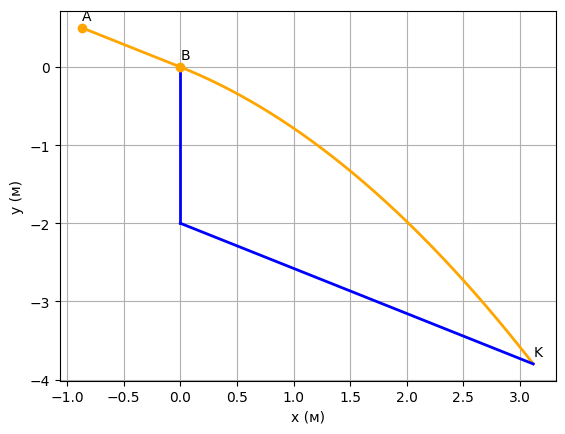

In [ ]:
if pict == 5:
    x_fly = arange(0,t_BK*speedAB, 0.001)
else:
   x_fly = arange(0,t_BK*speedAB*cos(alpha), 0.001)
#print(x_fly)
t_fly = x_fly / speedAB

match pict:
  case 0:
    graph = lambda t : - speedAB * tan(alpha) * t - 0.5 * grav * (t / cos(alpha)) ** 2
    plt.plot(x_fly, graph(t_fly), '-', lw=2, color = 'orange')
    plt.plot(x_fly, -tan(alpha)*x_fly - BD, '-', lw=2, color = 'blue')
    x1, y1 = [0, 0], [0, -BD]
    x2, y2 = [-AB*cos(alpha), 0], [AB*sin(alpha), 0]
    plt.text(-AB*cos(alpha), AB*sin(alpha)+0.1, 'A', fontsize=10)
    plt.plot(x1, y1, lw=2, color = 'blue')
    plt.plot(x2, y2, lw=2, color = 'orange', marker = 'o')
    plt.text(t_BK*speedAB*cos(alpha), -tan(alpha)*t_BK*speedAB*cos(alpha)-BD+0.1, 'K', fontsize=10)
  case 1:
    graph = speedAB * tan(alpha) * t_fly - 0.5 * grav * (t_fly / cos(alpha)) ** 2
    plt.plot(x_fly, graph, '-', lw=2, color = 'orange')
    plt.plot([0,CD], [-BC,-BC], '-', lw=2, color = 'blue')
    x1, y1 = [0, 0], [0, -BC]
    x2, y2 = [AB*cos(pi-alpha), 0], [-AB*sin(pi-alpha), 0]
    plt.text(AB*cos(pi-alpha), -AB*sin(pi-alpha)+0.1, 'A', fontsize=10)
    plt.plot(x1, y1, lw=2, color = 'blue')
    plt.plot(x2, y2, lw=2, color = 'orange', marker = 'o')
    x3, y3 = [CD, CD], [0, -BC]
    plt.plot(x3, y3, lw=2, color = 'blue')
    plt.text(t_BK*speedAB*cos(alpha), speedAB * t_BK * sin(alpha) - 0.5 * grav * (t_BK) ** 2 + 0.1, 'K', fontsize=10)
  case 2:
    graph = - 0.5 * grav * (t_fly / cos(alpha)) ** 2
    plt.plot([-AB,0], [0,0], lw=2, color = 'orange', marker = 'o')
    plt.plot([0,0], [0,-BD], '-', lw=2, color = 'blue')
    plt.plot(x_fly, graph, '-', lw=2, color = 'orange')
    plt.plot(x_fly, tan(pi/2 - beta)*x_fly - BD, '-', lw=2, color = 'blue')
    plt.text(-AB, 0.1, 'A', fontsize=10)
    plt.text(t_BK*speedAB, - 0.5 * grav * (t_BK) ** 2 + 0.1, 'K', fontsize=10)
  case 3:
    graph = speedAB * tan(alpha) * t_fly - 0.5 * grav * (t_fly / cos(alpha)) ** 2
    plt.plot(x_fly, graph, '-', lw=2, color='orange')
    plt.plot(x_fly, tan(beta)*x_fly - BD, '-', lw=2, color='blue')
    plt.plot([0,0], [0,-BD], '-', lw=2, color = 'blue')
    plt.plot([AB*cos(pi-alpha), 0], [-AB*sin(pi-alpha), 0], lw=2, color = 'orange', marker = 'o')
    plt.text(AB*cos(pi-alpha), -AB*sin(pi-alpha)+0.1, 'A', fontsize=10)
    plt.text(t_BK*speedAB*cos(alpha), speedAB * t_BK * sin(alpha) - 0.5 * grav * (t_BK) ** 2 + 0.1, 'K', fontsize=10)
  case 4:
    graph = - 0.5 * grav * (t_fly) ** 2
    plt.plot(x_fly, graph, '-', lw=2, color='orange')
    plt.plot([0,CD], [-BC,-BC], '-', lw=2, color='blue')
    plt.plot([0,0], [0,-BC], '-', lw=2, color = 'blue')
    plt.plot([CD,CD], [0,-BC], '-', lw=2, color = 'blue')
    plt.plot([-AB,0], [0,0], lw=2, color = 'orange', marker = 'o')
    plt.text(-AB, 0.1, 'A', fontsize=10)
    plt.text(t_BK*speedAB, - 0.5 * grav * (t_BK) ** 2 + 0.1, 'K', fontsize=10)
  case 5:
    graph = lambda t : - 0.5 * grav * (t) ** 2
    plt.plot(x_fly, graph(t_fly), '-', lw=2, color = 'orange')
    plt.plot(x_fly, -tan(alpha)*x_fly - BD, '-', lw=2, color = 'blue')
    x1, y1 = [0, 0], [0, -BD]
    x2, y2 = [-AB, 0], [0, 0]
    plt.plot(x1, y1, lw=2, color = 'blue')
    plt.plot(x2, y2, lw=2, color = 'orange', marker = 'o')
    plt.text(-AB, 0.1, 'A', fontsize=10)
    plt.text(t_BK*speedAB+0.001, graph(t_BK)+0.01, 'K', fontsize=10)
  case 6:
    graph = speedAB * tan(alpha) * t_fly - 0.5 * grav * (t_fly / cos(alpha)) ** 2
    plt.plot(x_fly, graph, '-', lw=2, color='orange')
    plt.plot(x_fly, 0*x_fly - BD, '-', lw=2, color='blue')
    plt.plot([0,0], [0,-BD], '-', lw=2, color = 'blue')
    plt.plot([AB*cos(pi-alpha), 0], [-AB*sin(pi-alpha), 0], lw=2, color = 'orange', marker = 'o')
    plt.text(AB*cos(pi-alpha), -AB*sin(pi-alpha)+0.1, 'A', fontsize=10)
    plt.text(t_BK*speedAB*cos(alpha), speedAB * t_BK * sin(alpha) - 0.5 * grav * (t_BK) ** 2 + 0.1, 'K', fontsize=10)
  case 7:
    graph = speedAB * tan(alpha) * t_fly - 0.5 * grav * (t_fly / cos(alpha)) ** 2
    plt.plot(x_fly, graph, '-', lw=2, color='orange')
    plt.plot(x_fly, -tan(pi/2 - beta)*x_fly, '-', lw=2, color='blue')
    plt.plot([0,0], [0,-AB*sin(alpha)], '-', lw=2, color = 'blue')
    plt.plot([AB*cos(pi-alpha), 0], [-AB*sin(pi-alpha), 0], lw=2, color = 'orange', marker = 'o')
    plt.text(AB*cos(pi-alpha), -AB*sin(pi-alpha)+0.1, 'A', fontsize=10)
    plt.text(t_BK*speedAB*cos(alpha), speedAB * t_BK * sin(alpha) - 0.5 * grav * (t_BK) ** 2 + 0.1, 'K', fontsize=10)
  case 8:
    graph = - speedAB * tan(alpha) * (t_fly) - 0.5 * grav * (t_fly / cos(alpha)) ** 2
    plt.plot(-x_fly, graph, '-', lw=2, color='orange')
    plt.plot(-x_fly, 0*x_fly - BC, '-', lw=2, color='blue')
    plt.plot([0,0], [0,-BC], '-', lw=2, color = 'blue')
    plt.plot([-AB*cos(pi-alpha), 0], [AB*sin(pi-alpha), 0], lw=2, color = 'orange', marker = 'o')
    plt.text(-AB*cos(pi-alpha), AB*sin(pi-alpha)+0.1, 'A', fontsize=10)
    plt.text(-t_BK*speedAB*cos(alpha), - speedAB * t_BK * sin(alpha) - 0.5 * grav * (t_BK) ** 2 + 0.1, 'K', fontsize=10)
  case 9:
    graph = - 0.5 * grav * (t_fly / cos(alpha)) ** 2
    plt.plot(x_fly, graph, '-', lw=2, color='orange')
    plt.plot(x_fly, -tan(pi/2 - beta)*x_fly, '-', lw=2, color='blue')
    plt.plot([-AB,0], [0,0], lw=2, color = 'orange', marker = 'o')
    plt.text(-AB, 0.1, 'A', fontsize=10)
    plt.text(t_BK*speedAB, - 0.5 * grav * (t_BK) ** 2 + 0.1, 'K', fontsize=10)

plt.text(0, 0.1, 'B', fontsize=10)
plt.xlabel('x (м)')
plt.ylabel('y (м)')
plt.subplot(1, 1, 1)
plt.grid(True)
plt.show()


Полученный график, уравнение и время на разных участках являются решением и ответом задачи с тридцатью вариантами.